# Hierarchical Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset
- Only selecting `Annual Income` and `Spending Score` in order to visualise clusters.

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Using the dendrogram to find the optimal number of clusters
- Here, instead of using `sklearn` library, we are using `scipy` library.
- Here, we are using `ward` method = Minimum Variance Method. which is very popular, best for Hierarchical clustering.
  > The linkage function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster.

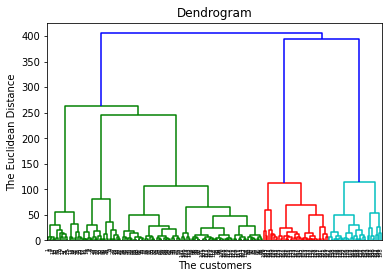

In [5]:
import scipy.cluster.hierarchy as sch   # Scipy Clustere Hierarchy
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))    # method of minimum variance = ward. 

plt.title('Dendrogram')
plt.xlabel('The customers')   # Notice that `xlabel` is neither a Annual Income or Spending Score. but it represents the customers(through CustomerID)
# plt.xlabel('The Observation points') # can also call observation points.
plt.ylabel('The Euclidean Distance')
plt.show()

- Here 200 customrs are displayed on X-axis.
- Aftere Measuring maximum vertical length, we get to know that Optimal number of clusters are `5`/`3` as both lenghs are almost similar.
  > Here we'll consider the optimal number of clusters, as `5`. 

## Training the Hierarchical Clustering model on the dataset
- Back to `sklearn` 😎
- Parameters ; 
  - `n_clusters`
  - `affinity` : Type of distance calculation (Euclidean method)
  - `linkage` : ward method (Minimum Variance method)
  

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

- Predicted clusters : 

In [7]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


## Visualising the clusters
- Same clusters are generated as `k-means`

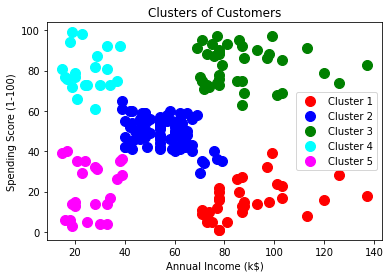

In [8]:
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc==3,0], X[y_hc==3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc==4,0], X[y_hc==4,1], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

---
- For 3 clusters : 

In [9]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [10]:
print(y_hc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


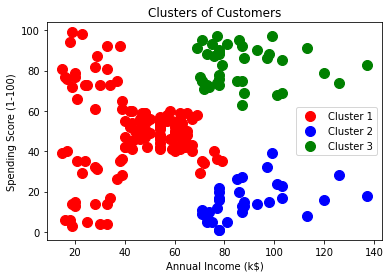

In [11]:
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- Here we can see that `5` clusters were better then 3!